# Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

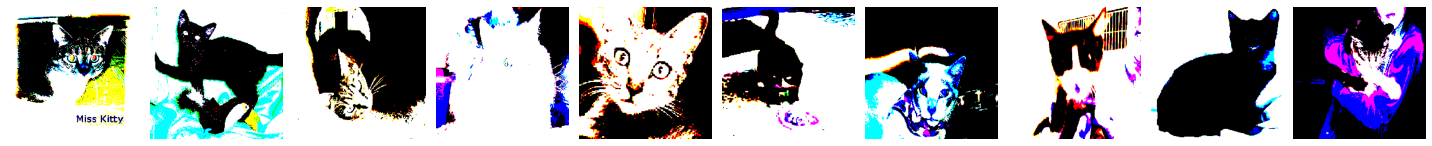

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [23]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [24]:
X_test = test_batches
y_test = test_batches.classes

In [25]:
predictions = model.predict(x=X_test, verbose=2)

10/10 - 2s


In [26]:
rounded_predictions = np.argmax(np.round(predictions), axis=-1)  

In [27]:
y_pred=rounded_predictions

# Confusion Matrix

In [28]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[24 26]
 [12 38]]


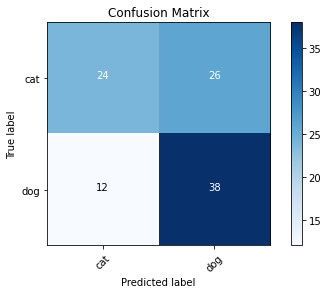

In [30]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [31]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  62 correct predictions.
 The result is telling us that we have:  38 incorrect predictions.
 We have a total predictions of:  100


# Classification Report

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.48      0.56        50
           1       0.59      0.76      0.67        50

    accuracy                           0.62       100
   macro avg       0.63      0.62      0.61       100
weighted avg       0.63      0.62      0.61       100



In [33]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of the Convolutional Neural Network model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("\nWell, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Convolutional Neural Network model: 62.00%

Well, you got a classification rate of 62.00%


In [34]:
#calculate Precision
print("Precision of the Convolutional Neural Network model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("\nPrecision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Convolutional Neural Network model predicted an image is of dog, that image is actually of dog", "{:.2%}".format(metrics.precision_score(y_test, y_pred)) ,"of the time.")

Precision of the Convolutional Neural Network model: 59.38%

Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Convolutional Neural Network model predicted an image is of dog, that image is actually of dog 59.38% of the time.


In [35]:
#calculate Recall
print("Recall of the Convolutional Neural Network model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("\nRecall: If there is an image of dog present in the test set, our Convolutional Neural Network model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Recall of the Convolutional Neural Network model: 76.00%

Recall: If there is an image of dog present in the test set, our Convolutional Neural Network model can identify it 76.00% of the time.


# ROC AUC Curve

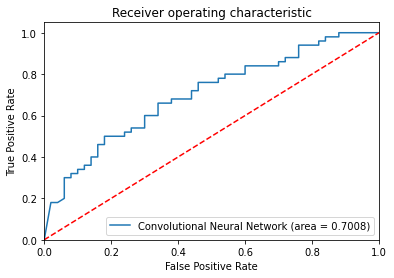

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
cnn_roc_auc = roc_auc_score(y_test, model.predict(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Convolutional Neural Network (area = %0.4f)' % cnn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CNN_ROC')
plt.show()